# ⚛ **Mental Health care Chatbot**



In [1]:
from google.colab import files
files.upload()  # Upload the downloaded `kaggle.json`

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omarkhaleds","key":"6410aa773aa8bbd9b5c58504638f62ae"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions

In [3]:
!kaggle datasets download -d atharvjairath/empathetic-dialogues-facebook-ai
!unzip -q empathetic-dialogues-facebook-ai.zip


Dataset URL: https://www.kaggle.com/datasets/atharvjairath/empathetic-dialogues-facebook-ai
License(s): CC-BY-NC-SA-4.0


In [4]:
! kaggle datasets download -d thanakomsn/glove6b300dtxt
! unzip -q glove6b300dtxt.zip

Dataset URL: https://www.kaggle.com/datasets/thanakomsn/glove6b300dtxt
License(s): DbCL-1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import re
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [6]:
df = pd.read_csv('/content/emotion-emotion_69k.csv')

In [7]:
df.head()

Unnamed: 0                                          Situation      emotion  \
0           0  I remember going to the fireworks with my best...  sentimental   
1           1  I remember going to the fireworks with my best...  sentimental   
2           2  I remember going to the fireworks with my best...  sentimental   
3           3  I remember going to the fireworks with my best...  sentimental   
4           4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels Unnamed: 5 Unnamed: 6  
0  Was this a friend you were in love with, or ju...        NaN        NaN  
1                                Where has she gone?        NaN        NaN  
2  Oh was this something that happened because of...        NaN        NaN  
3                This was a best friend. I miss her.        NaN        NaN  
4                                 We no longer talk.        NaN        NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64636 entries, 0 to 64635
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            64636 non-null  int64 
 1   Situation             64636 non-null  object
 2   emotion               64632 non-null  object
 3   empathetic_dialogues  64636 non-null  object
 4   labels                64636 non-null  object
 5   Unnamed: 5            113 non-null    object
 6   Unnamed: 6            5 non-null      object
dtypes: int64(1), object(6)
memory usage: 3.5+ MB


#Data prepossing

In [9]:
df.drop(columns=['Unnamed: 0','Unnamed: 5','Unnamed: 6'],inplace=True)

In [10]:
df.head()

Situation      emotion  \
0  I remember going to the fireworks with my best...  sentimental   
1  I remember going to the fireworks with my best...  sentimental   
2  I remember going to the fireworks with my best...  sentimental   
3  I remember going to the fireworks with my best...  sentimental   
4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels  
0  Was this a friend you were in love with, or ju...  
1                                Where has she gone?  
2  Oh was this something that happened because of...  
3                This was a best friend. I miss her.  
4                                 We no longer talk.

In [11]:
df.isnull().sum()

Situation               0
emotion                 4
empathetic_dialogues    0
labels                  0
dtype: int64

In [12]:
df.dropna(subset=['emotion'],inplace=True)

In [13]:
df.isnull().sum()

Situation               0
emotion                 0
empathetic_dialogues    0
labels                  0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(8)

In [15]:
df[df.duplicated()]


Situation       emotion  \
32383  I cannot wait for the newest Pokemon game, it ...  anticipating   
32463  I am upset with Nintendo recently, they have n...  disappointed   
44502  I am excited for the next football season, the...       excited   
45912  My father in law's operation next week. I have...      faithful   
46878  I think I can get everything I need to get acc...     confident   
48441  i knew i shouldnt have trusted my brother with...      trusting   
50481  i knew i shouldnt have trusted my brother with...      trusting   
51055  i knew i shouldnt have trusted my brother with...      trusting   

                                    empathetic_dialogues  \
32383  Customer :I cannot wait for the newest Pokemon...   
32463               Customer :What do you mean?\nAgent :   
44502  Customer :I am excited for the next football s...   
45912  Customer :My father in law's heart surgery is ...   
46878  Customer :What all do you have to get done?\nA...   
48441  Customer :i knew i shouldnt have trusted my br...   
50481  Customer :i knew i shouldnt have trusted my br...   
51055                  Customer :What happened?\nAgent :   

                                                  labels  
32383                            Those games do seem fun  
32463  You said they didn't have a direct in a while ...  
44502                          Are you a big Eagles fan?  
45912  Oh, that must be stressful. Do you think he is...  
46878  Lots of cleaning. Cleaning out the garage and ...  
48441                                     What happened?  
50481                                     What happened?  
51055                                    my dog ran away

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64624 non-null  object
 1   emotion               64624 non-null  object
 2   empathetic_dialogues  64624 non-null  object
 3   labels                64624 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [19]:
df.shape

(64624, 4)

In [20]:
df['emotion'] = df['emotion'].astype('category')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Situation             64624 non-null  object  
 1   emotion               64624 non-null  category
 2   empathetic_dialogues  64624 non-null  object  
 3   labels                64624 non-null  object  
dtypes: category(1), object(3)
memory usage: 2.0+ MB


In [22]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [23]:
df['emotion'].unique()

['sentimental', 'afraid', 'proud', 'faithful', 'terrified', ..., 't believe my daughter taught herself how to p..., 't think I wold like super heroes', 'm so mad with my brother. He stole from me an..., ' but what I didn't know was that he was worki..., '(']
Length: 43
Categories (43, object): [' I really killed it!', ' a boy.  I hear all these different labor sto...,
                          ' but what I didn't know was that he was worki..., ' time to jump on the motorcycle and go cruisi..., ...,
                          't even like scary things', 't think I wold like super heroes', 'terrified',
                          'trusting']

In [24]:
df['emotion'].nunique()

43

In [25]:
df[df['emotion'] == 't believe my daughter taught herself how to play the ukelele. I was amazed']

Situation                                            emotion  \
35867     I can  t believe my daughter taught herself how to pl...   
35868     I can  t believe my daughter taught herself how to pl...   
35869     I can  t believe my daughter taught herself how to pl...   
35870     I can  t believe my daughter taught herself how to pl...   
35871     I can  t believe my daughter taught herself how to pl...   

      empathetic_dialogues                                             labels  
35867            impressed  Customer :MY daughter taught herself to play t...  
35868            impressed  Customer :she is 13. I was really impressed\nA...  
35869            impressed  Customer :I should pat myself on the back lol\...  
35870            impressed  Customer :Wow that is impressive, how old is s...  
35871            impressed  Customer :That is impressive, congrats on rais...

In [26]:
df[df['emotion'] == '(']

Situation emotion empathetic_dialogues  \
64217  My dog died right after my cat died.        (                  sad   
64218  My dog died right after my cat died.        (                  sad   
64219  My dog died right after my cat died.        (                  sad   

                                                  labels  
64217  Customer :My puppy died right after my cat.\nA...  
64218  Customer :It is horrible, i dont know what to ...  
64219  Customer :Sorry to hear that. You must be goin...

In [27]:
df[df['emotion'].str.split().str.len() == 1]['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [28]:
df = df[df['emotion'].str.split().str.len() == 1].copy()

In [29]:
df = df[df['emotion'] != '(']


In [30]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [31]:
df = df[df['emotion'].notnull()].copy()



In [32]:
df['emotion'] = df['emotion'].astype(str)


In [33]:
df = df[df['emotion'].isin(df['emotion'].value_counts()[df['emotion'].value_counts() > 0].index)]

In [34]:
df['emotion'].value_counts()


emotion
surprised       3295
excited         2464
angry           2296
proud           2247
annoyed         2213
sad             2213
lonely          2106
afraid          2094
grateful        2091
terrified       2074
guilty          2053
furious         2045
disgusted       2044
anxious         2037
confident       2036
anticipating    2025
hopeful         2019
impressed       2004
nostalgic       1996
disappointed    1968
jealous         1955
joyful          1953
prepared        1937
content         1903
devastated      1856
embarrassed     1844
sentimental     1773
caring          1765
trusting        1752
ashamed         1694
apprehensive    1549
faithful        1282
Name: count, dtype: int64

In [35]:
df['emotion'].nunique()

32

In [36]:
df.shape

(64583, 4)

In [37]:
df.sample(10)

Situation     emotion  \
57499  I am very pleased with my son. He has been on ...   impressed   
58827  I was driving on the road one day and I saw a ...     anxious   
37195              I wrote an exam, and it was a success      joyful   
54713  I was devastated when I found out that my daug...  devastated   
16496  My friend let his girlfriend go spend the nigh...    trusting   
7384   I've been practicing speaking in front of peop...    prepared   
2442   My mom was sick when she went on vacation. I w...      caring   
53768  My life right now is so great, I would not cha...     content   
13562  It's always a shock finding dried poop hidden ...   surprised   
41269  There was a hula hoop contest and a bunch of k...       proud   

                                    empathetic_dialogues  \
57499  Customer :That is great, How far is he away fr...   
58827  Customer :Good for you! Animals need people li...   
37195        Customer :what was the exam about?\nAgent :   
54713  Customer :We've never facetimed, but that's su...   
16496  Customer :What are your thoughts on that?\nAge...   
7384   Customer :I'm going to tell some jokes and hop...   
2442   Customer :When my mom got sick i feel sick too...   
53768  Customer :I am so happy with my life currently...   
13562  Customer :Not too big but you should see the s...   
41269  Customer :That's so cool!  You must be proud. ...   

                                                  labels  
57499  1800 miles away! Hopefully some day he will mo...  
58827  We as people need to protect animals. They are...  
37195  I'm sorry - what exam are you talking about?  ...  
54713  lol -- I FaceTime with my 10 year who is upsta...  
16496                        I think it's inappropriate.  
7384    That is very brave.  I a sure you will do great!  
2442   Have you ever spoken to someone else about it?...  
53768  Ahhhh thats amazing! I stay home with my kids ...  
13562                                      i can imagine  
41269  I tried and lost in the first round! She is mo...

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64583 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64583 non-null  object
 1   emotion               64583 non-null  object
 2   empathetic_dialogues  64583 non-null  object
 3   labels                64583 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


# Exploratory Data Analysis

In [ ]:

emotion_counts = df['emotion'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=emotion_counts.index,
    y=emotion_counts.values,
    marker=dict(color=emotion_counts.values, colorscale='Plasma')
))

fig.update_layout(
    title='Emotion Distribution',
    xaxis_title='Emotion',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=-45),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

fig.show()


In [ ]:
# 🔥 Recommended Color Scales for a Dark Background
# ✅ "Plasma" – High contrast, yellow-to-purple
# ✅ "Viridis" – Green-to-yellow gradient
# ✅ "Inferno" – Dark red to bright yellow
# ✅ "Magma" – Deep purple to orange
# ✅ "Cividis" – Blueish to yellow

In [ ]:
df['text_length'] = df['Situation'].astype(str).apply(len)
fig = px.box(df, x='emotion', y='text_length',
             title="Text Length Distribution per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Text Length'},
             color='emotion',
             template='plotly_dark')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


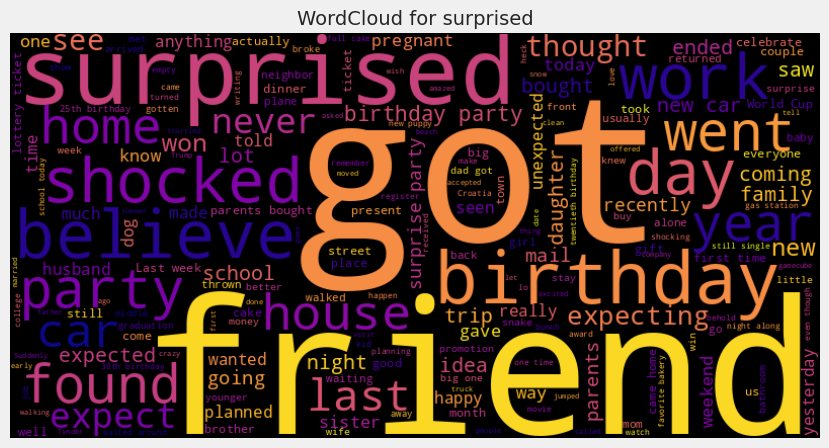

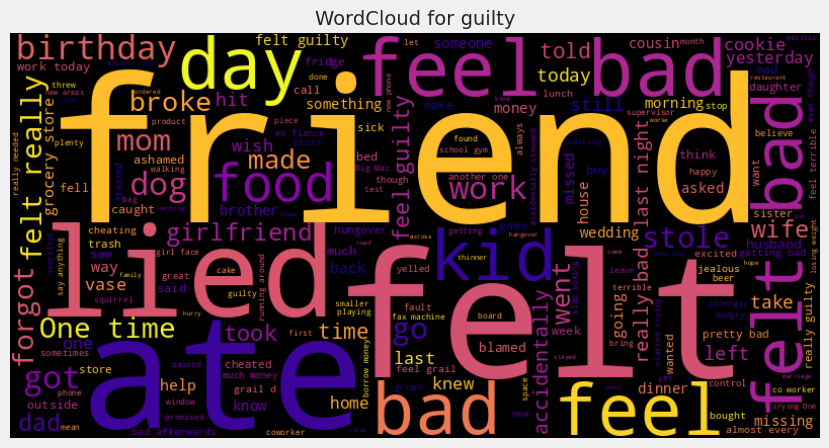

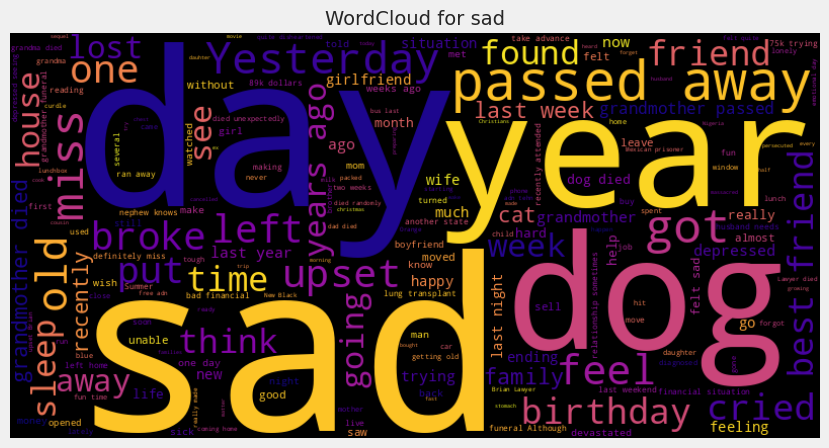

In [ ]:
def plot_wordcloud(emotion):
    text = " ".join(df[df['emotion'] == emotion]['Situation'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

for emo in df['emotion'].value_counts().index[:3]:
    plot_wordcloud(emo)


In [ ]:
emotion_text_length = df.groupby('emotion')['text_length'].mean().reset_index().sort_values(by='text_length')

fig = px.bar(emotion_text_length, x='emotion', y='text_length',
             title="Average Text Length per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Average Text Length'},
             color='text_length',
             color_continuous_scale='Inferno',
             template='plotly_dark')


fig.update_layout(xaxis_tickangle=-45)
fig.show()


#Emotion detectoin Model

In [ ]:
label_encoder = LabelEncoder()
df['emotion_label'] = label_encoder.fit_transform(df['emotion'])
df.sample(5)

Situation    emotion  \
53421  When I was a kid I threw a rock at a boy. It h...    ashamed   
61927  i thought someone was breaking into my apartme...  terrified   
54013  I was ashamed when I decided to drop out of sc...    ashamed   
38197  I had to put my dog to sleep yesterday.  I am ...        sad   
56757  My brother was addicted to drugs for ten years...      proud   

                                    empathetic_dialogues  \
53421  Customer :Oh no! Did you get in trouble?\nAgent :   
61927  Customer :did you call the police? or did you ...   
54013  Customer :Did you hear the "You'll be a ditch-...   
38197  Customer :I am hurting so bad right now.\nAgent :   
56757  Customer :Have you ever had a family member ev...   

                                                  labels  text_length  \
53421  It's hard to believe but I didn't. I honestly ...          119   
61927  well i heard a noise at the window..when i loo...           59   
54013  How did you guess? I was told a lot of things ...           50   
38197  Time will heal. Remember you dog for all the g...           71   
56757  Sometimes I'm worried that I'm that family mem...          187   

       emotion_label  
53421              6  
61927             30  
54013              6  
38197             27  
56757             26

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Situation'], df['emotion_label'], test_size=0.2, random_state=42)

In [ ]:

max_len = int(np.percentile(X_train.apply(len), 95))

print(f"Optimal max_len: {max_len}")


Optimal max_len: 185


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

vocab_size = len(tokenizer.word_index) + 1
max_len = 185

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test),
          epochs=10, batch_size=32, callbacks=[early_stopping])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



1615/1615 ━━━━━━━━━━━━━━━━━━━━ 759s 467ms/step - accuracy: 0.2009 - loss: 2.7967 - val_accuracy: 0.5246 - val_loss: 1.5793
Epoch 2/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 827s 483ms/step - accuracy: 0.6094 - loss: 1.2773 - val_accuracy: 0.6693 - val_loss: 1.0912
Epoch 3/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 805s 485ms/step - accuracy: 0.7556 - loss: 0.7992 - val_accuracy: 0.7503 - val_loss: 0.8383
Epoch 4/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 753s 466ms/step - accuracy: 0.8307 - loss: 0.5557 - val_accuracy: 0.8120 - val_loss: 0.6481
Epoch 5/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 789s 489ms/step - accuracy: 0.8800 - loss: 0.3962 - val_accuracy: 0.8606 - val_loss: 0.5065
Epoch 6/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 815s 497ms/step - accuracy: 0.9120 - loss: 0.2853 - val_accuracy: 0.8785 - val_loss: 0.4427
Epoch 7/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 766s 474ms/step - accuracy: 0.9348 - loss: 0.2133 - val_accuracy: 0.9058 - val_loss: 0.3714
Epoch 8/10
1615/1615 ━━━━━━━━━━━━━━━━━━━━ 804s 475ms/step - accuracy: 0.9

In [ ]:
df.sample(3)

Situation  emotion  \
12208  My friend got promoted at work but I did not. ...  jealous   
53579         I am always satisfied with whatever i have  content   
18997  Such a quiet and relaxing Sunday.  So calm and...  content   

                                    empathetic_dialogues  \
12208  Customer :That is disappointing.  Is there oth...   
53579                    Customer :Why is that?\nAgent :   
18997          Customer :thats good.. any plans\nAgent :   

                                                  labels  text_length  \
12208  I really like here. I just wish it was me that...           96   
53579                   I like to manage whatever i have           42   
18997                        nothing but just relaxation           59   

       emotion_label  
12208             21  
53579              9  
18997              9

In [ ]:
df['Situation'][62456]

"I went to Hershey park this summer with the kids. I rode a roller coaster for the the first time in years. I don't think I have every screamed that loud in my life."

In [ ]:
df['Situation'][4295]

"I can't wait for school to start back. A litlle quieter in the house."

In [ ]:
df['Situation'][23131]

"I've been stressing at work, and my coworker gave me a pair of movie tickets they weren't using."

In [ ]:
def predict_emotion(text):
    seq = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=max_len)
    predicted_label = model.predict(seq).argmax()
    return label_encoder.inverse_transform([predicted_label])[0]

# Example predictions
print(predict_emotion("I went to Hershey park this summer with the kids. I rode a roller coaster for the the first time in years. I don't think I have every screamed that loud in my life."))
print(predict_emotion("I can't wait for school to start back. A litlle quieter in the house."))
print(predict_emotion("I've been stressing at work, and my coworker gave me a pair of movie tickets they weren't using."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
terrified
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
anxious
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
grateful


In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 5','Unnamed: 6'],inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 5','Unnamed: 6'],inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 5','Unnamed: 6'],inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 5','Unnamed: 6'],inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 5','Unnamed: 6'],inplace=True)

In [ ]:
df.head()

Situation      emotion  \
0  I remember going to the fireworks with my best...  sentimental   
1  I remember going to the fireworks with my best...  sentimental   
2  I remember going to the fireworks with my best...  sentimental   
3  I remember going to the fireworks with my best...  sentimental   
4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels  
0  Was this a friend you were in love with, or ju...  
1                                Where has she gone?  
2  Oh was this something that happened because of...  
3                This was a best friend. I miss her.  
4                                 We no longer talk.

In [ ]:
df.isnull().sum()

Situation               0
emotion                 4
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.dropna(subset=['emotion'],inplace=True)

In [ ]:
df.isnull().sum()

Situation               0
emotion                 0
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(8)

In [ ]:
df[df.duplicated()]


Situation       emotion  \
32383  I cannot wait for the newest Pokemon game, it ...  anticipating   
32463  I am upset with Nintendo recently, they have n...  disappointed   
44502  I am excited for the next football season, the...       excited   
45912  My father in law's operation next week. I have...      faithful   
46878  I think I can get everything I need to get acc...     confident   
48441  i knew i shouldnt have trusted my brother with...      trusting   
50481  i knew i shouldnt have trusted my brother with...      trusting   
51055  i knew i shouldnt have trusted my brother with...      trusting   

                                    empathetic_dialogues  \
32383  Customer :I cannot wait for the newest Pokemon...   
32463               Customer :What do you mean?\nAgent :   
44502  Customer :I am excited for the next football s...   
45912  Customer :My father in law's heart surgery is ...   
46878  Customer :What all do you have to get done?\nA...   
48441  Customer :i knew i shouldnt have trusted my br...   
50481  Customer :i knew i shouldnt have trusted my br...   
51055                  Customer :What happened?\nAgent :   

                                                  labels  
32383                            Those games do seem fun  
32463  You said they didn't have a direct in a while ...  
44502                          Are you a big Eagles fan?  
45912  Oh, that must be stressful. Do you think he is...  
46878  Lots of cleaning. Cleaning out the garage and ...  
48441                                     What happened?  
50481                                     What happened?  
51055                                    my dog ran away

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64624 non-null  object
 1   emotion               64624 non-null  object
 2   empathetic_dialogues  64624 non-null  object
 3   labels                64624 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [ ]:
df.shape

(64624, 4)

In [ ]:
df['emotion'] = df['emotion'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Situation             64624 non-null  object  
 1   emotion               64624 non-null  category
 2   empathetic_dialogues  64624 non-null  object  
 3   labels                64624 non-null  object  
dtypes: category(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df['emotion'].unique()

['sentimental', 'afraid', 'proud', 'faithful', 'terrified', ..., 't believe my daughter taught herself how to p..., 't think I wold like super heroes', 'm so mad with my brother. He stole from me an..., ' but what I didn't know was that he was worki..., '(']
Length: 43
Categories (43, object): [' I really killed it!', ' a boy.  I hear all these different labor sto...,
                          ' but what I didn't know was that he was worki..., ' time to jump on the motorcycle and go cruisi..., ...,
                          't even like scary things', 't think I wold like super heroes', 'terrified',
                          'trusting']

In [ ]:
df['emotion'].nunique()

43

In [ ]:
df[df['emotion'] == 't believe my daughter taught herself how to play the ukelele. I was amazed']

Situation                                            emotion  \
35867     I can  t believe my daughter taught herself how to pl...   
35868     I can  t believe my daughter taught herself how to pl...   
35869     I can  t believe my daughter taught herself how to pl...   
35870     I can  t believe my daughter taught herself how to pl...   
35871     I can  t believe my daughter taught herself how to pl...   

      empathetic_dialogues                                             labels  
35867            impressed  Customer :MY daughter taught herself to play t...  
35868            impressed  Customer :she is 13. I was really impressed\nA...  
35869            impressed  Customer :I should pat myself on the back lol\...  
35870            impressed  Customer :Wow that is impressive, how old is s...  
35871            impressed  Customer :That is impressive, congrats on rais...

In [ ]:
df[df['emotion'] == '(']

Situation emotion empathetic_dialogues  \
64217  My dog died right after my cat died.        (                  sad   
64218  My dog died right after my cat died.        (                  sad   
64219  My dog died right after my cat died.        (                  sad   

                                                  labels  
64217  Customer :My puppy died right after my cat.\nA...  
64218  Customer :It is horrible, i dont know what to ...  
64219  Customer :Sorry to hear that. You must be goin...

In [ ]:
df[df['emotion'].str.split().str.len() == 1]['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].str.split().str.len() == 1].copy()

In [ ]:
df = df[df['emotion'] != '(']


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].notnull()].copy()



In [ ]:
df['emotion'] = df['emotion'].astype(str)


In [ ]:
df = df[df['emotion'].isin(df['emotion'].value_counts()[df['emotion'].value_counts() > 0].index)]

In [ ]:
df['emotion'].value_counts()


emotion
surprised       3295
excited         2464
angry           2296
proud           2247
annoyed         2213
sad             2213
lonely          2106
afraid          2094
grateful        2091
terrified       2074
guilty          2053
furious         2045
disgusted       2044
anxious         2037
confident       2036
anticipating    2025
hopeful         2019
impressed       2004
nostalgic       1996
disappointed    1968
jealous         1955
joyful          1953
prepared        1937
content         1903
devastated      1856
embarrassed     1844
sentimental     1773
caring          1765
trusting        1752
ashamed         1694
apprehensive    1549
faithful        1282
Name: count, dtype: int64

In [ ]:
df['emotion'].nunique()

32

In [ ]:
df.shape

(64583, 4)

In [ ]:
df.sample(10)

Situation     emotion  \
57499  I am very pleased with my son. He has been on ...   impressed   
58827  I was driving on the road one day and I saw a ...     anxious   
37195              I wrote an exam, and it was a success      joyful   
54713  I was devastated when I found out that my daug...  devastated   
16496  My friend let his girlfriend go spend the nigh...    trusting   
7384   I've been practicing speaking in front of peop...    prepared   
2442   My mom was sick when she went on vacation. I w...      caring   
53768  My life right now is so great, I would not cha...     content   
13562  It's always a shock finding dried poop hidden ...   surprised   
41269  There was a hula hoop contest and a bunch of k...       proud   

                                    empathetic_dialogues  \
57499  Customer :That is great, How far is he away fr...   
58827  Customer :Good for you! Animals need people li...   
37195        Customer :what was the exam about?\nAgent :   
54713  Customer :We've never facetimed, but that's su...   
16496  Customer :What are your thoughts on that?\nAge...   
7384   Customer :I'm going to tell some jokes and hop...   
2442   Customer :When my mom got sick i feel sick too...   
53768  Customer :I am so happy with my life currently...   
13562  Customer :Not too big but you should see the s...   
41269  Customer :That's so cool!  You must be proud. ...   

                                                  labels  
57499  1800 miles away! Hopefully some day he will mo...  
58827  We as people need to protect animals. They are...  
37195  I'm sorry - what exam are you talking about?  ...  
54713  lol -- I FaceTime with my 10 year who is upsta...  
16496                        I think it's inappropriate.  
7384    That is very brave.  I a sure you will do great!  
2442   Have you ever spoken to someone else about it?...  
53768  Ahhhh thats amazing! I stay home with my kids ...  
13562                                      i can imagine  
41269  I tried and lost in the first round! She is mo...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64583 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64583 non-null  object
 1   emotion               64583 non-null  object
 2   empathetic_dialogues  64583 non-null  object
 3   labels                64583 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


# Exploratory Data Analysis

In [ ]:

emotion_counts = df['emotion'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=emotion_counts.index,
    y=emotion_counts.values,
    marker=dict(color=emotion_counts.values, colorscale='Plasma')
))

fig.update_layout(
    title='Emotion Distribution',
    xaxis_title='Emotion',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=-45),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

fig.show()


In [ ]:
# 🔥 Recommended Color Scales for a Dark Background
# ✅ "Plasma" – High contrast, yellow-to-purple
# ✅ "Viridis" – Green-to-yellow gradient
# ✅ "Inferno" – Dark red to bright yellow
# ✅ "Magma" – Deep purple to orange
# ✅ "Cividis" – Blueish to yellow

In [ ]:
df['text_length'] = df['Situation'].astype(str).apply(len)
fig = px.box(df, x='emotion', y='text_length',
             title="Text Length Distribution per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Text Length'},
             color='emotion',
             template='plotly_dark')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


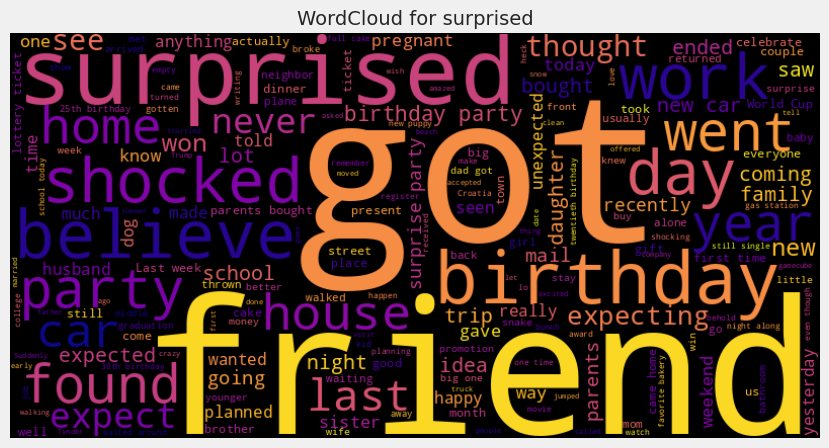

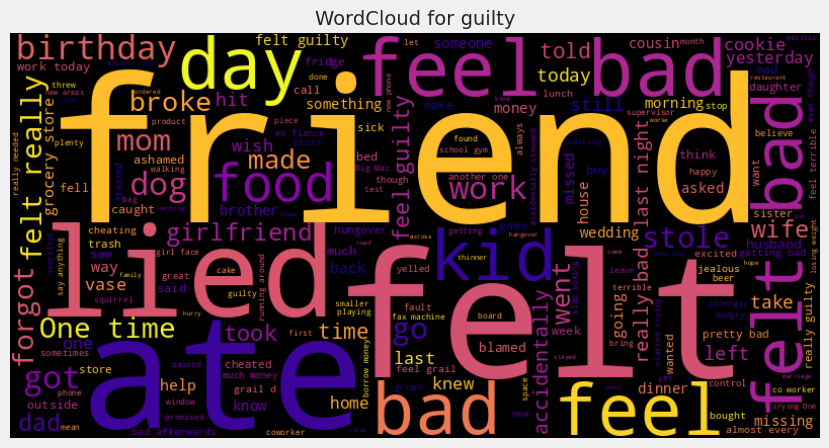

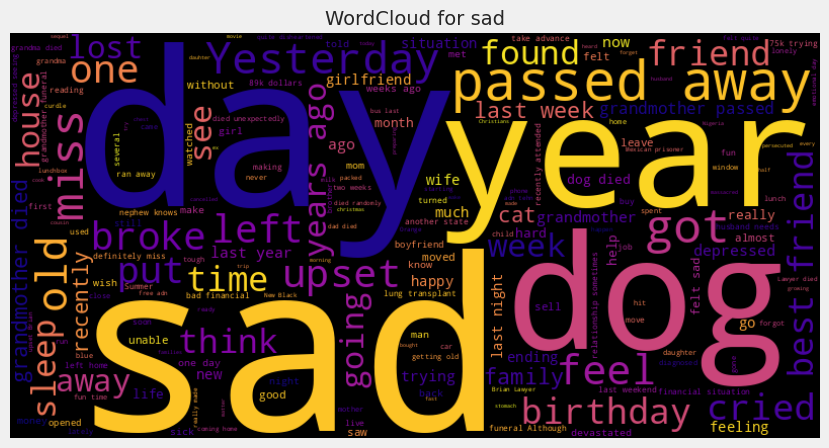

In [ ]:
def plot_wordcloud(emotion):
    text = " ".join(df[df['emotion'] == emotion]['Situation'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

for emo in df['emotion'].value_counts().index[:3]:
    plot_wordcloud(emo)


In [ ]:
emotion_text_length = df.groupby('emotion')['text_length'].mean().reset_index().sort_values(by='text_length')

fig = px.bar(emotion_text_length, x='emotion', y='text_length',
             title="Average Text Length per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Average Text Length'},
             color='text_length',
             color_continuous_scale='Inferno',
             template='plotly_dark')


fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
df.head()

Situation      emotion  \
0  I remember going to the fireworks with my best...  sentimental   
1  I remember going to the fireworks with my best...  sentimental   
2  I remember going to the fireworks with my best...  sentimental   
3  I remember going to the fireworks with my best...  sentimental   
4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels  
0  Was this a friend you were in love with, or ju...  
1                                Where has she gone?  
2  Oh was this something that happened because of...  
3                This was a best friend. I miss her.  
4                                 We no longer talk.

In [ ]:
df.isnull().sum()

Situation               0
emotion                 4
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.dropna(subset=['emotion'],inplace=True)

In [ ]:
df.isnull().sum()

Situation               0
emotion                 0
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(8)

In [ ]:
df[df.duplicated()]


Situation       emotion  \
32383  I cannot wait for the newest Pokemon game, it ...  anticipating   
32463  I am upset with Nintendo recently, they have n...  disappointed   
44502  I am excited for the next football season, the...       excited   
45912  My father in law's operation next week. I have...      faithful   
46878  I think I can get everything I need to get acc...     confident   
48441  i knew i shouldnt have trusted my brother with...      trusting   
50481  i knew i shouldnt have trusted my brother with...      trusting   
51055  i knew i shouldnt have trusted my brother with...      trusting   

                                    empathetic_dialogues  \
32383  Customer :I cannot wait for the newest Pokemon...   
32463               Customer :What do you mean?\nAgent :   
44502  Customer :I am excited for the next football s...   
45912  Customer :My father in law's heart surgery is ...   
46878  Customer :What all do you have to get done?\nA...   
48441  Customer :i knew i shouldnt have trusted my br...   
50481  Customer :i knew i shouldnt have trusted my br...   
51055                  Customer :What happened?\nAgent :   

                                                  labels  
32383                            Those games do seem fun  
32463  You said they didn't have a direct in a while ...  
44502                          Are you a big Eagles fan?  
45912  Oh, that must be stressful. Do you think he is...  
46878  Lots of cleaning. Cleaning out the garage and ...  
48441                                     What happened?  
50481                                     What happened?  
51055                                    my dog ran away

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64624 non-null  object
 1   emotion               64624 non-null  object
 2   empathetic_dialogues  64624 non-null  object
 3   labels                64624 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [ ]:
df.shape

(64624, 4)

In [ ]:
df['emotion'] = df['emotion'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Situation             64624 non-null  object  
 1   emotion               64624 non-null  category
 2   empathetic_dialogues  64624 non-null  object  
 3   labels                64624 non-null  object  
dtypes: category(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df['emotion'].unique()

['sentimental', 'afraid', 'proud', 'faithful', 'terrified', ..., 't believe my daughter taught herself how to p..., 't think I wold like super heroes', 'm so mad with my brother. He stole from me an..., ' but what I didn't know was that he was worki..., '(']
Length: 43
Categories (43, object): [' I really killed it!', ' a boy.  I hear all these different labor sto...,
                          ' but what I didn't know was that he was worki..., ' time to jump on the motorcycle and go cruisi..., ...,
                          't even like scary things', 't think I wold like super heroes', 'terrified',
                          'trusting']

In [ ]:
df['emotion'].nunique()

43

In [ ]:
df[df['emotion'] == 't believe my daughter taught herself how to play the ukelele. I was amazed']

Situation                                            emotion  \
35867     I can  t believe my daughter taught herself how to pl...   
35868     I can  t believe my daughter taught herself how to pl...   
35869     I can  t believe my daughter taught herself how to pl...   
35870     I can  t believe my daughter taught herself how to pl...   
35871     I can  t believe my daughter taught herself how to pl...   

      empathetic_dialogues                                             labels  
35867            impressed  Customer :MY daughter taught herself to play t...  
35868            impressed  Customer :she is 13. I was really impressed\nA...  
35869            impressed  Customer :I should pat myself on the back lol\...  
35870            impressed  Customer :Wow that is impressive, how old is s...  
35871            impressed  Customer :That is impressive, congrats on rais...

In [ ]:
df[df['emotion'] == '(']

Situation emotion empathetic_dialogues  \
64217  My dog died right after my cat died.        (                  sad   
64218  My dog died right after my cat died.        (                  sad   
64219  My dog died right after my cat died.        (                  sad   

                                                  labels  
64217  Customer :My puppy died right after my cat.\nA...  
64218  Customer :It is horrible, i dont know what to ...  
64219  Customer :Sorry to hear that. You must be goin...

In [ ]:
df[df['emotion'].str.split().str.len() == 1]['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].str.split().str.len() == 1].copy()

In [ ]:
df = df[df['emotion'] != '(']


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].notnull()].copy()



In [ ]:
df['emotion'] = df['emotion'].astype(str)


In [ ]:
df = df[df['emotion'].isin(df['emotion'].value_counts()[df['emotion'].value_counts() > 0].index)]

In [ ]:
df['emotion'].value_counts()


emotion
surprised       3295
excited         2464
angry           2296
proud           2247
annoyed         2213
sad             2213
lonely          2106
afraid          2094
grateful        2091
terrified       2074
guilty          2053
furious         2045
disgusted       2044
anxious         2037
confident       2036
anticipating    2025
hopeful         2019
impressed       2004
nostalgic       1996
disappointed    1968
jealous         1955
joyful          1953
prepared        1937
content         1903
devastated      1856
embarrassed     1844
sentimental     1773
caring          1765
trusting        1752
ashamed         1694
apprehensive    1549
faithful        1282
Name: count, dtype: int64

In [ ]:
df['emotion'].nunique()

32

In [ ]:
df.shape

(64583, 4)

In [ ]:
df.sample(10)

Situation     emotion  \
57499  I am very pleased with my son. He has been on ...   impressed   
58827  I was driving on the road one day and I saw a ...     anxious   
37195              I wrote an exam, and it was a success      joyful   
54713  I was devastated when I found out that my daug...  devastated   
16496  My friend let his girlfriend go spend the nigh...    trusting   
7384   I've been practicing speaking in front of peop...    prepared   
2442   My mom was sick when she went on vacation. I w...      caring   
53768  My life right now is so great, I would not cha...     content   
13562  It's always a shock finding dried poop hidden ...   surprised   
41269  There was a hula hoop contest and a bunch of k...       proud   

                                    empathetic_dialogues  \
57499  Customer :That is great, How far is he away fr...   
58827  Customer :Good for you! Animals need people li...   
37195        Customer :what was the exam about?\nAgent :   
54713  Customer :We've never facetimed, but that's su...   
16496  Customer :What are your thoughts on that?\nAge...   
7384   Customer :I'm going to tell some jokes and hop...   
2442   Customer :When my mom got sick i feel sick too...   
53768  Customer :I am so happy with my life currently...   
13562  Customer :Not too big but you should see the s...   
41269  Customer :That's so cool!  You must be proud. ...   

                                                  labels  
57499  1800 miles away! Hopefully some day he will mo...  
58827  We as people need to protect animals. They are...  
37195  I'm sorry - what exam are you talking about?  ...  
54713  lol -- I FaceTime with my 10 year who is upsta...  
16496                        I think it's inappropriate.  
7384    That is very brave.  I a sure you will do great!  
2442   Have you ever spoken to someone else about it?...  
53768  Ahhhh thats amazing! I stay home with my kids ...  
13562                                      i can imagine  
41269  I tried and lost in the first round! She is mo...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64583 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64583 non-null  object
 1   emotion               64583 non-null  object
 2   empathetic_dialogues  64583 non-null  object
 3   labels                64583 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


# Exploratory Data Analysis

In [ ]:

emotion_counts = df['emotion'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=emotion_counts.index,
    y=emotion_counts.values,
    marker=dict(color=emotion_counts.values, colorscale='Plasma')
))

fig.update_layout(
    title='Emotion Distribution',
    xaxis_title='Emotion',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=-45),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

fig.show()


In [ ]:
# 🔥 Recommended Color Scales for a Dark Background
# ✅ "Plasma" – High contrast, yellow-to-purple
# ✅ "Viridis" – Green-to-yellow gradient
# ✅ "Inferno" – Dark red to bright yellow
# ✅ "Magma" – Deep purple to orange
# ✅ "Cividis" – Blueish to yellow

In [ ]:
df['text_length'] = df['Situation'].astype(str).apply(len)
fig = px.box(df, x='emotion', y='text_length',
             title="Text Length Distribution per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Text Length'},
             color='emotion',
             template='plotly_dark')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


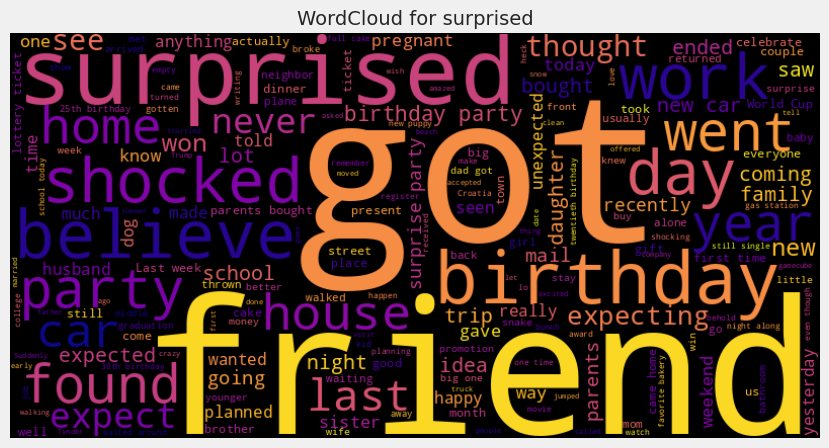

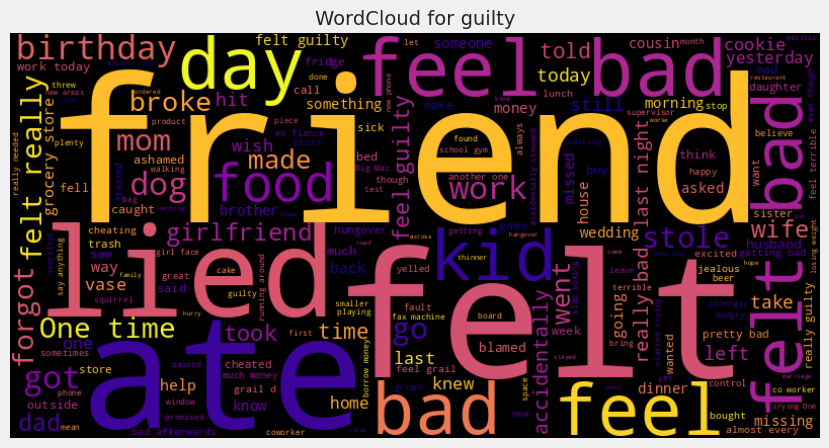

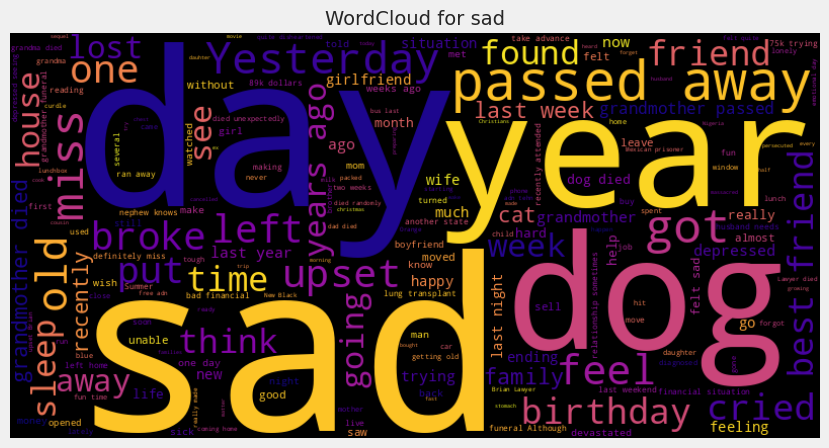

In [ ]:
def plot_wordcloud(emotion):
    text = " ".join(df[df['emotion'] == emotion]['Situation'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

for emo in df['emotion'].value_counts().index[:3]:
    plot_wordcloud(emo)


In [ ]:
emotion_text_length = df.groupby('emotion')['text_length'].mean().reset_index().sort_values(by='text_length')

fig = px.bar(emotion_text_length, x='emotion', y='text_length',
             title="Average Text Length per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Average Text Length'},
             color='text_length',
             color_continuous_scale='Inferno',
             template='plotly_dark')


fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
df.head()

Situation      emotion  \
0  I remember going to the fireworks with my best...  sentimental   
1  I remember going to the fireworks with my best...  sentimental   
2  I remember going to the fireworks with my best...  sentimental   
3  I remember going to the fireworks with my best...  sentimental   
4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels  
0  Was this a friend you were in love with, or ju...  
1                                Where has she gone?  
2  Oh was this something that happened because of...  
3                This was a best friend. I miss her.  
4                                 We no longer talk.

In [ ]:
df.isnull().sum()

Situation               0
emotion                 4
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.dropna(subset=['emotion'],inplace=True)

In [ ]:
df.isnull().sum()

Situation               0
emotion                 0
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(8)

In [ ]:
df[df.duplicated()]


Situation       emotion  \
32383  I cannot wait for the newest Pokemon game, it ...  anticipating   
32463  I am upset with Nintendo recently, they have n...  disappointed   
44502  I am excited for the next football season, the...       excited   
45912  My father in law's operation next week. I have...      faithful   
46878  I think I can get everything I need to get acc...     confident   
48441  i knew i shouldnt have trusted my brother with...      trusting   
50481  i knew i shouldnt have trusted my brother with...      trusting   
51055  i knew i shouldnt have trusted my brother with...      trusting   

                                    empathetic_dialogues  \
32383  Customer :I cannot wait for the newest Pokemon...   
32463               Customer :What do you mean?\nAgent :   
44502  Customer :I am excited for the next football s...   
45912  Customer :My father in law's heart surgery is ...   
46878  Customer :What all do you have to get done?\nA...   
48441  Customer :i knew i shouldnt have trusted my br...   
50481  Customer :i knew i shouldnt have trusted my br...   
51055                  Customer :What happened?\nAgent :   

                                                  labels  
32383                            Those games do seem fun  
32463  You said they didn't have a direct in a while ...  
44502                          Are you a big Eagles fan?  
45912  Oh, that must be stressful. Do you think he is...  
46878  Lots of cleaning. Cleaning out the garage and ...  
48441                                     What happened?  
50481                                     What happened?  
51055                                    my dog ran away

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64624 non-null  object
 1   emotion               64624 non-null  object
 2   empathetic_dialogues  64624 non-null  object
 3   labels                64624 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [ ]:
df.shape

(64624, 4)

In [ ]:
df['emotion'] = df['emotion'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Situation             64624 non-null  object  
 1   emotion               64624 non-null  category
 2   empathetic_dialogues  64624 non-null  object  
 3   labels                64624 non-null  object  
dtypes: category(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df['emotion'].unique()

['sentimental', 'afraid', 'proud', 'faithful', 'terrified', ..., 't believe my daughter taught herself how to p..., 't think I wold like super heroes', 'm so mad with my brother. He stole from me an..., ' but what I didn't know was that he was worki..., '(']
Length: 43
Categories (43, object): [' I really killed it!', ' a boy.  I hear all these different labor sto...,
                          ' but what I didn't know was that he was worki..., ' time to jump on the motorcycle and go cruisi..., ...,
                          't even like scary things', 't think I wold like super heroes', 'terrified',
                          'trusting']

In [ ]:
df['emotion'].nunique()

43

In [ ]:
df[df['emotion'] == 't believe my daughter taught herself how to play the ukelele. I was amazed']

Situation                                            emotion  \
35867     I can  t believe my daughter taught herself how to pl...   
35868     I can  t believe my daughter taught herself how to pl...   
35869     I can  t believe my daughter taught herself how to pl...   
35870     I can  t believe my daughter taught herself how to pl...   
35871     I can  t believe my daughter taught herself how to pl...   

      empathetic_dialogues                                             labels  
35867            impressed  Customer :MY daughter taught herself to play t...  
35868            impressed  Customer :she is 13. I was really impressed\nA...  
35869            impressed  Customer :I should pat myself on the back lol\...  
35870            impressed  Customer :Wow that is impressive, how old is s...  
35871            impressed  Customer :That is impressive, congrats on rais...

In [ ]:
df[df['emotion'] == '(']

Situation emotion empathetic_dialogues  \
64217  My dog died right after my cat died.        (                  sad   
64218  My dog died right after my cat died.        (                  sad   
64219  My dog died right after my cat died.        (                  sad   

                                                  labels  
64217  Customer :My puppy died right after my cat.\nA...  
64218  Customer :It is horrible, i dont know what to ...  
64219  Customer :Sorry to hear that. You must be goin...

In [ ]:
df[df['emotion'].str.split().str.len() == 1]['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].str.split().str.len() == 1].copy()

In [ ]:
df = df[df['emotion'] != '(']


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].notnull()].copy()



In [ ]:
df['emotion'] = df['emotion'].astype(str)


In [ ]:
df = df[df['emotion'].isin(df['emotion'].value_counts()[df['emotion'].value_counts() > 0].index)]

In [ ]:
df['emotion'].value_counts()


emotion
surprised       3295
excited         2464
angry           2296
proud           2247
annoyed         2213
sad             2213
lonely          2106
afraid          2094
grateful        2091
terrified       2074
guilty          2053
furious         2045
disgusted       2044
anxious         2037
confident       2036
anticipating    2025
hopeful         2019
impressed       2004
nostalgic       1996
disappointed    1968
jealous         1955
joyful          1953
prepared        1937
content         1903
devastated      1856
embarrassed     1844
sentimental     1773
caring          1765
trusting        1752
ashamed         1694
apprehensive    1549
faithful        1282
Name: count, dtype: int64

In [ ]:
df['emotion'].nunique()

32

In [ ]:
df.shape

(64583, 4)

In [ ]:
df.sample(10)

Situation     emotion  \
57499  I am very pleased with my son. He has been on ...   impressed   
58827  I was driving on the road one day and I saw a ...     anxious   
37195              I wrote an exam, and it was a success      joyful   
54713  I was devastated when I found out that my daug...  devastated   
16496  My friend let his girlfriend go spend the nigh...    trusting   
7384   I've been practicing speaking in front of peop...    prepared   
2442   My mom was sick when she went on vacation. I w...      caring   
53768  My life right now is so great, I would not cha...     content   
13562  It's always a shock finding dried poop hidden ...   surprised   
41269  There was a hula hoop contest and a bunch of k...       proud   

                                    empathetic_dialogues  \
57499  Customer :That is great, How far is he away fr...   
58827  Customer :Good for you! Animals need people li...   
37195        Customer :what was the exam about?\nAgent :   
54713  Customer :We've never facetimed, but that's su...   
16496  Customer :What are your thoughts on that?\nAge...   
7384   Customer :I'm going to tell some jokes and hop...   
2442   Customer :When my mom got sick i feel sick too...   
53768  Customer :I am so happy with my life currently...   
13562  Customer :Not too big but you should see the s...   
41269  Customer :That's so cool!  You must be proud. ...   

                                                  labels  
57499  1800 miles away! Hopefully some day he will mo...  
58827  We as people need to protect animals. They are...  
37195  I'm sorry - what exam are you talking about?  ...  
54713  lol -- I FaceTime with my 10 year who is upsta...  
16496                        I think it's inappropriate.  
7384    That is very brave.  I a sure you will do great!  
2442   Have you ever spoken to someone else about it?...  
53768  Ahhhh thats amazing! I stay home with my kids ...  
13562                                      i can imagine  
41269  I tried and lost in the first round! She is mo...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64583 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64583 non-null  object
 1   emotion               64583 non-null  object
 2   empathetic_dialogues  64583 non-null  object
 3   labels                64583 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


# Exploratory Data Analysis

In [ ]:

emotion_counts = df['emotion'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=emotion_counts.index,
    y=emotion_counts.values,
    marker=dict(color=emotion_counts.values, colorscale='Plasma')
))

fig.update_layout(
    title='Emotion Distribution',
    xaxis_title='Emotion',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=-45),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

fig.show()


In [ ]:
# 🔥 Recommended Color Scales for a Dark Background
# ✅ "Plasma" – High contrast, yellow-to-purple
# ✅ "Viridis" – Green-to-yellow gradient
# ✅ "Inferno" – Dark red to bright yellow
# ✅ "Magma" – Deep purple to orange
# ✅ "Cividis" – Blueish to yellow

In [ ]:
df['text_length'] = df['Situation'].astype(str).apply(len)
fig = px.box(df, x='emotion', y='text_length',
             title="Text Length Distribution per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Text Length'},
             color='emotion',
             template='plotly_dark')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


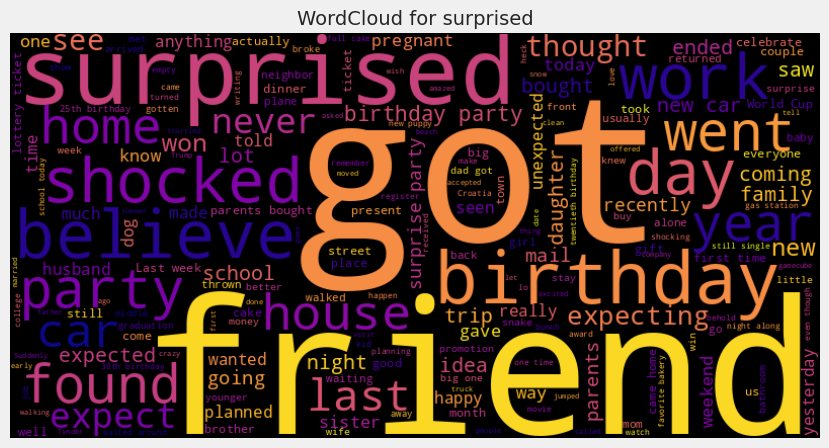

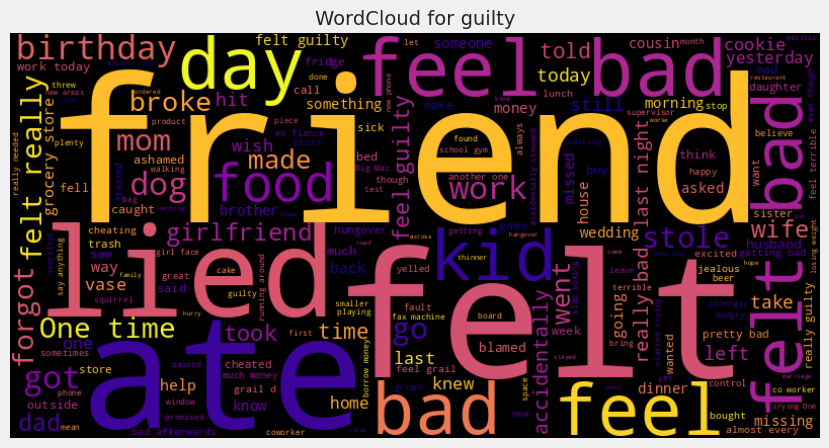

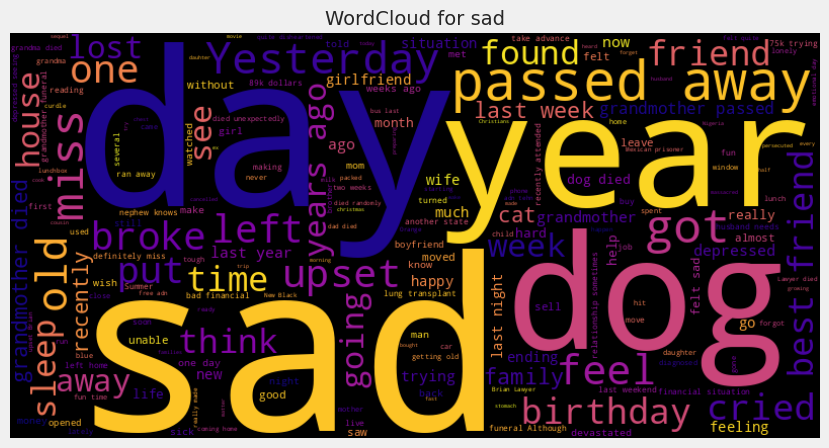

In [ ]:
def plot_wordcloud(emotion):
    text = " ".join(df[df['emotion'] == emotion]['Situation'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

for emo in df['emotion'].value_counts().index[:3]:
    plot_wordcloud(emo)


In [ ]:
emotion_text_length = df.groupby('emotion')['text_length'].mean().reset_index().sort_values(by='text_length')

fig = px.bar(emotion_text_length, x='emotion', y='text_length',
             title="Average Text Length per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Average Text Length'},
             color='text_length',
             color_continuous_scale='Inferno',
             template='plotly_dark')


fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
df.head()

Situation      emotion  \
0  I remember going to the fireworks with my best...  sentimental   
1  I remember going to the fireworks with my best...  sentimental   
2  I remember going to the fireworks with my best...  sentimental   
3  I remember going to the fireworks with my best...  sentimental   
4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels  
0  Was this a friend you were in love with, or ju...  
1                                Where has she gone?  
2  Oh was this something that happened because of...  
3                This was a best friend. I miss her.  
4                                 We no longer talk.

In [ ]:
df.isnull().sum()

Situation               0
emotion                 4
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.dropna(subset=['emotion'],inplace=True)

In [ ]:
df.isnull().sum()

Situation               0
emotion                 0
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(8)

In [ ]:
df[df.duplicated()]


Situation       emotion  \
32383  I cannot wait for the newest Pokemon game, it ...  anticipating   
32463  I am upset with Nintendo recently, they have n...  disappointed   
44502  I am excited for the next football season, the...       excited   
45912  My father in law's operation next week. I have...      faithful   
46878  I think I can get everything I need to get acc...     confident   
48441  i knew i shouldnt have trusted my brother with...      trusting   
50481  i knew i shouldnt have trusted my brother with...      trusting   
51055  i knew i shouldnt have trusted my brother with...      trusting   

                                    empathetic_dialogues  \
32383  Customer :I cannot wait for the newest Pokemon...   
32463               Customer :What do you mean?\nAgent :   
44502  Customer :I am excited for the next football s...   
45912  Customer :My father in law's heart surgery is ...   
46878  Customer :What all do you have to get done?\nA...   
48441  Customer :i knew i shouldnt have trusted my br...   
50481  Customer :i knew i shouldnt have trusted my br...   
51055                  Customer :What happened?\nAgent :   

                                                  labels  
32383                            Those games do seem fun  
32463  You said they didn't have a direct in a while ...  
44502                          Are you a big Eagles fan?  
45912  Oh, that must be stressful. Do you think he is...  
46878  Lots of cleaning. Cleaning out the garage and ...  
48441                                     What happened?  
50481                                     What happened?  
51055                                    my dog ran away

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64624 non-null  object
 1   emotion               64624 non-null  object
 2   empathetic_dialogues  64624 non-null  object
 3   labels                64624 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [ ]:
df.shape

(64624, 4)

In [ ]:
df['emotion'] = df['emotion'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Situation             64624 non-null  object  
 1   emotion               64624 non-null  category
 2   empathetic_dialogues  64624 non-null  object  
 3   labels                64624 non-null  object  
dtypes: category(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df['emotion'].unique()

['sentimental', 'afraid', 'proud', 'faithful', 'terrified', ..., 't believe my daughter taught herself how to p..., 't think I wold like super heroes', 'm so mad with my brother. He stole from me an..., ' but what I didn't know was that he was worki..., '(']
Length: 43
Categories (43, object): [' I really killed it!', ' a boy.  I hear all these different labor sto...,
                          ' but what I didn't know was that he was worki..., ' time to jump on the motorcycle and go cruisi..., ...,
                          't even like scary things', 't think I wold like super heroes', 'terrified',
                          'trusting']

In [ ]:
df['emotion'].nunique()

43

In [ ]:
df[df['emotion'] == 't believe my daughter taught herself how to play the ukelele. I was amazed']

Situation                                            emotion  \
35867     I can  t believe my daughter taught herself how to pl...   
35868     I can  t believe my daughter taught herself how to pl...   
35869     I can  t believe my daughter taught herself how to pl...   
35870     I can  t believe my daughter taught herself how to pl...   
35871     I can  t believe my daughter taught herself how to pl...   

      empathetic_dialogues                                             labels  
35867            impressed  Customer :MY daughter taught herself to play t...  
35868            impressed  Customer :she is 13. I was really impressed\nA...  
35869            impressed  Customer :I should pat myself on the back lol\...  
35870            impressed  Customer :Wow that is impressive, how old is s...  
35871            impressed  Customer :That is impressive, congrats on rais...

In [ ]:
df[df['emotion'] == '(']

Situation emotion empathetic_dialogues  \
64217  My dog died right after my cat died.        (                  sad   
64218  My dog died right after my cat died.        (                  sad   
64219  My dog died right after my cat died.        (                  sad   

                                                  labels  
64217  Customer :My puppy died right after my cat.\nA...  
64218  Customer :It is horrible, i dont know what to ...  
64219  Customer :Sorry to hear that. You must be goin...

In [ ]:
df[df['emotion'].str.split().str.len() == 1]['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].str.split().str.len() == 1].copy()

In [ ]:
df = df[df['emotion'] != '(']


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].notnull()].copy()



In [ ]:
df['emotion'] = df['emotion'].astype(str)


In [ ]:
df = df[df['emotion'].isin(df['emotion'].value_counts()[df['emotion'].value_counts() > 0].index)]

In [ ]:
df['emotion'].value_counts()


emotion
surprised       3295
excited         2464
angry           2296
proud           2247
annoyed         2213
sad             2213
lonely          2106
afraid          2094
grateful        2091
terrified       2074
guilty          2053
furious         2045
disgusted       2044
anxious         2037
confident       2036
anticipating    2025
hopeful         2019
impressed       2004
nostalgic       1996
disappointed    1968
jealous         1955
joyful          1953
prepared        1937
content         1903
devastated      1856
embarrassed     1844
sentimental     1773
caring          1765
trusting        1752
ashamed         1694
apprehensive    1549
faithful        1282
Name: count, dtype: int64

In [ ]:
df['emotion'].nunique()

32

In [ ]:
df.shape

(64583, 4)

In [ ]:
df.sample(10)

Situation     emotion  \
57499  I am very pleased with my son. He has been on ...   impressed   
58827  I was driving on the road one day and I saw a ...     anxious   
37195              I wrote an exam, and it was a success      joyful   
54713  I was devastated when I found out that my daug...  devastated   
16496  My friend let his girlfriend go spend the nigh...    trusting   
7384   I've been practicing speaking in front of peop...    prepared   
2442   My mom was sick when she went on vacation. I w...      caring   
53768  My life right now is so great, I would not cha...     content   
13562  It's always a shock finding dried poop hidden ...   surprised   
41269  There was a hula hoop contest and a bunch of k...       proud   

                                    empathetic_dialogues  \
57499  Customer :That is great, How far is he away fr...   
58827  Customer :Good for you! Animals need people li...   
37195        Customer :what was the exam about?\nAgent :   
54713  Customer :We've never facetimed, but that's su...   
16496  Customer :What are your thoughts on that?\nAge...   
7384   Customer :I'm going to tell some jokes and hop...   
2442   Customer :When my mom got sick i feel sick too...   
53768  Customer :I am so happy with my life currently...   
13562  Customer :Not too big but you should see the s...   
41269  Customer :That's so cool!  You must be proud. ...   

                                                  labels  
57499  1800 miles away! Hopefully some day he will mo...  
58827  We as people need to protect animals. They are...  
37195  I'm sorry - what exam are you talking about?  ...  
54713  lol -- I FaceTime with my 10 year who is upsta...  
16496                        I think it's inappropriate.  
7384    That is very brave.  I a sure you will do great!  
2442   Have you ever spoken to someone else about it?...  
53768  Ahhhh thats amazing! I stay home with my kids ...  
13562                                      i can imagine  
41269  I tried and lost in the first round! She is mo...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64583 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64583 non-null  object
 1   emotion               64583 non-null  object
 2   empathetic_dialogues  64583 non-null  object
 3   labels                64583 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


# Exploratory Data Analysis

In [ ]:

emotion_counts = df['emotion'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=emotion_counts.index,
    y=emotion_counts.values,
    marker=dict(color=emotion_counts.values, colorscale='Plasma')
))

fig.update_layout(
    title='Emotion Distribution',
    xaxis_title='Emotion',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=-45),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

fig.show()


In [ ]:
# 🔥 Recommended Color Scales for a Dark Background
# ✅ "Plasma" – High contrast, yellow-to-purple
# ✅ "Viridis" – Green-to-yellow gradient
# ✅ "Inferno" – Dark red to bright yellow
# ✅ "Magma" – Deep purple to orange
# ✅ "Cividis" – Blueish to yellow

In [ ]:
df['text_length'] = df['Situation'].astype(str).apply(len)
fig = px.box(df, x='emotion', y='text_length',
             title="Text Length Distribution per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Text Length'},
             color='emotion',
             template='plotly_dark')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


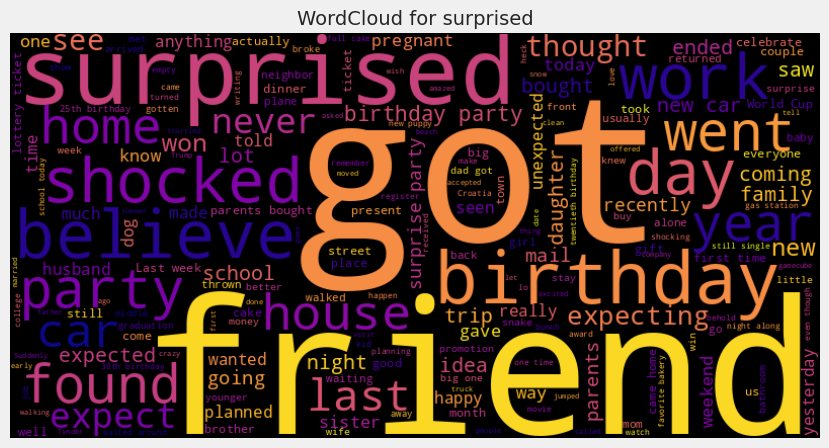

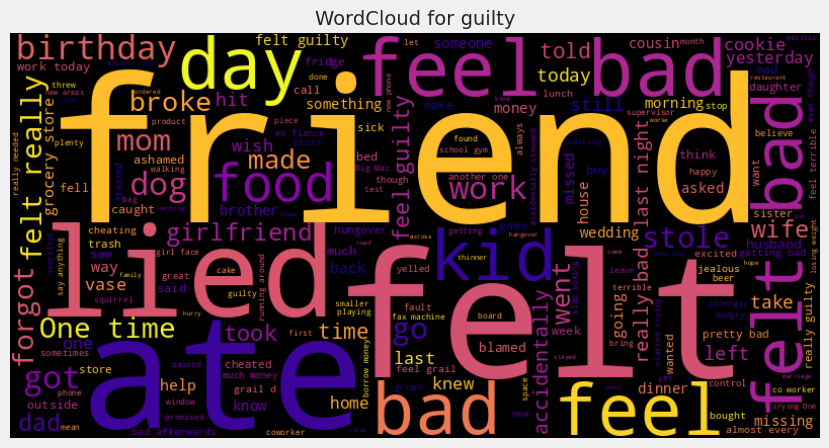

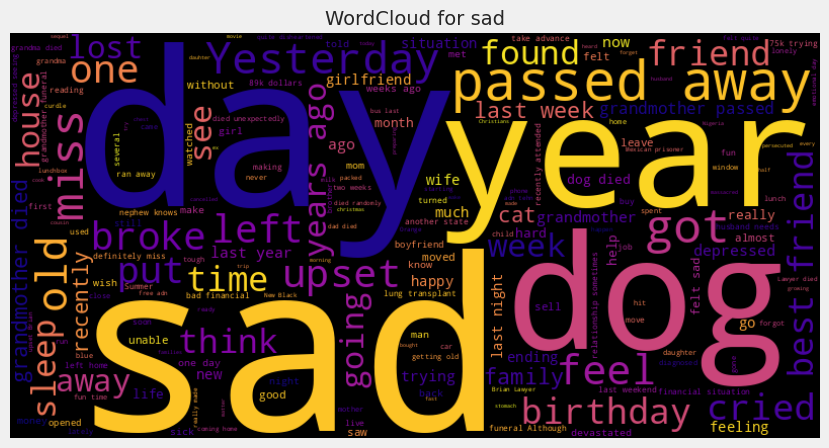

In [ ]:
def plot_wordcloud(emotion):
    text = " ".join(df[df['emotion'] == emotion]['Situation'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

for emo in df['emotion'].value_counts().index[:3]:
    plot_wordcloud(emo)


In [ ]:
emotion_text_length = df.groupby('emotion')['text_length'].mean().reset_index().sort_values(by='text_length')

fig = px.bar(emotion_text_length, x='emotion', y='text_length',
             title="Average Text Length per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Average Text Length'},
             color='text_length',
             color_continuous_scale='Inferno',
             template='plotly_dark')


fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
df.head()

Situation      emotion  \
0  I remember going to the fireworks with my best...  sentimental   
1  I remember going to the fireworks with my best...  sentimental   
2  I remember going to the fireworks with my best...  sentimental   
3  I remember going to the fireworks with my best...  sentimental   
4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels  
0  Was this a friend you were in love with, or ju...  
1                                Where has she gone?  
2  Oh was this something that happened because of...  
3                This was a best friend. I miss her.  
4                                 We no longer talk.

In [ ]:
df.isnull().sum()

Situation               0
emotion                 4
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.dropna(subset=['emotion'],inplace=True)

In [ ]:
df.isnull().sum()

Situation               0
emotion                 0
empathetic_dialogues    0
labels                  0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(8)

In [ ]:
df[df.duplicated()]


Situation       emotion  \
32383  I cannot wait for the newest Pokemon game, it ...  anticipating   
32463  I am upset with Nintendo recently, they have n...  disappointed   
44502  I am excited for the next football season, the...       excited   
45912  My father in law's operation next week. I have...      faithful   
46878  I think I can get everything I need to get acc...     confident   
48441  i knew i shouldnt have trusted my brother with...      trusting   
50481  i knew i shouldnt have trusted my brother with...      trusting   
51055  i knew i shouldnt have trusted my brother with...      trusting   

                                    empathetic_dialogues  \
32383  Customer :I cannot wait for the newest Pokemon...   
32463               Customer :What do you mean?\nAgent :   
44502  Customer :I am excited for the next football s...   
45912  Customer :My father in law's heart surgery is ...   
46878  Customer :What all do you have to get done?\nA...   
48441  Customer :i knew i shouldnt have trusted my br...   
50481  Customer :i knew i shouldnt have trusted my br...   
51055                  Customer :What happened?\nAgent :   

                                                  labels  
32383                            Those games do seem fun  
32463  You said they didn't have a direct in a while ...  
44502                          Are you a big Eagles fan?  
45912  Oh, that must be stressful. Do you think he is...  
46878  Lots of cleaning. Cleaning out the garage and ...  
48441                                     What happened?  
50481                                     What happened?  
51055                                    my dog ran away

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64624 non-null  object
 1   emotion               64624 non-null  object
 2   empathetic_dialogues  64624 non-null  object
 3   labels                64624 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [ ]:
df.shape

(64624, 4)

In [ ]:
df['emotion'] = df['emotion'].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64624 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Situation             64624 non-null  object  
 1   emotion               64624 non-null  category
 2   empathetic_dialogues  64624 non-null  object  
 3   labels                64624 non-null  object  
dtypes: category(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df['emotion'].unique()

['sentimental', 'afraid', 'proud', 'faithful', 'terrified', ..., 't believe my daughter taught herself how to p..., 't think I wold like super heroes', 'm so mad with my brother. He stole from me an..., ' but what I didn't know was that he was worki..., '(']
Length: 43
Categories (43, object): [' I really killed it!', ' a boy.  I hear all these different labor sto...,
                          ' but what I didn't know was that he was worki..., ' time to jump on the motorcycle and go cruisi..., ...,
                          't even like scary things', 't think I wold like super heroes', 'terrified',
                          'trusting']

In [ ]:
df['emotion'].nunique()

43

In [ ]:
df[df['emotion'] == 't believe my daughter taught herself how to play the ukelele. I was amazed']

Situation                                            emotion  \
35867     I can  t believe my daughter taught herself how to pl...   
35868     I can  t believe my daughter taught herself how to pl...   
35869     I can  t believe my daughter taught herself how to pl...   
35870     I can  t believe my daughter taught herself how to pl...   
35871     I can  t believe my daughter taught herself how to pl...   

      empathetic_dialogues                                             labels  
35867            impressed  Customer :MY daughter taught herself to play t...  
35868            impressed  Customer :she is 13. I was really impressed\nA...  
35869            impressed  Customer :I should pat myself on the back lol\...  
35870            impressed  Customer :Wow that is impressive, how old is s...  
35871            impressed  Customer :That is impressive, congrats on rais...

In [ ]:
df[df['emotion'] == '(']

Situation emotion empathetic_dialogues  \
64217  My dog died right after my cat died.        (                  sad   
64218  My dog died right after my cat died.        (                  sad   
64219  My dog died right after my cat died.        (                  sad   

                                                  labels  
64217  Customer :My puppy died right after my cat.\nA...  
64218  Customer :It is horrible, i dont know what to ...  
64219  Customer :Sorry to hear that. You must be goin...

In [ ]:
df[df['emotion'].str.split().str.len() == 1]['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].str.split().str.len() == 1].copy()

In [ ]:
df = df[df['emotion'] != '(']


In [ ]:
df['emotion'].value_counts()

emotion
surprised                                                                                                                                                                                         3295
excited                                                                                                                                                                                           2464
angry                                                                                                                                                                                             2296
proud                                                                                                                                                                                             2247
sad                                                                                                                                                                                               2213
annoyed                                                                                                                                                                                           2213
lonely                                                                                                                                                                                            2106
afraid                                                                                                                                                                                            2094
grateful                                                                                                                                                                                          2091
terrified                                                                                                                                                                                         2074
guilty                                                                                                                                                                                            2053
furious                                                                                                                                                                                           2045
disgusted                                                                                                                                                                                         2044
anxious                                                                                                                                                                                           2037
confident                                                                                                                                                                                         2036
anticipating                                                                                                                                                                                      2025
hopeful                                                                                                                                                                                           2019
impressed                                                                                                                                                                                         2004
nostalgic                                                                                                                                                                                         1996
disappointed                                                                                                                                                                                      1968
jealous     

In [ ]:
df = df[df['emotion'].notnull()].copy()



In [ ]:
df['emotion'] = df['emotion'].astype(str)


In [ ]:
df = df[df['emotion'].isin(df['emotion'].value_counts()[df['emotion'].value_counts() > 0].index)]

In [ ]:
df['emotion'].value_counts()


emotion
surprised       3295
excited         2464
angry           2296
proud           2247
annoyed         2213
sad             2213
lonely          2106
afraid          2094
grateful        2091
terrified       2074
guilty          2053
furious         2045
disgusted       2044
anxious         2037
confident       2036
anticipating    2025
hopeful         2019
impressed       2004
nostalgic       1996
disappointed    1968
jealous         1955
joyful          1953
prepared        1937
content         1903
devastated      1856
embarrassed     1844
sentimental     1773
caring          1765
trusting        1752
ashamed         1694
apprehensive    1549
faithful        1282
Name: count, dtype: int64

In [ ]:
df['emotion'].nunique()

32

In [ ]:
df.shape

(64583, 4)

In [ ]:
df.sample(10)

Situation     emotion  \
57499  I am very pleased with my son. He has been on ...   impressed   
58827  I was driving on the road one day and I saw a ...     anxious   
37195              I wrote an exam, and it was a success      joyful   
54713  I was devastated when I found out that my daug...  devastated   
16496  My friend let his girlfriend go spend the nigh...    trusting   
7384   I've been practicing speaking in front of peop...    prepared   
2442   My mom was sick when she went on vacation. I w...      caring   
53768  My life right now is so great, I would not cha...     content   
13562  It's always a shock finding dried poop hidden ...   surprised   
41269  There was a hula hoop contest and a bunch of k...       proud   

                                    empathetic_dialogues  \
57499  Customer :That is great, How far is he away fr...   
58827  Customer :Good for you! Animals need people li...   
37195        Customer :what was the exam about?\nAgent :   
54713  Customer :We've never facetimed, but that's su...   
16496  Customer :What are your thoughts on that?\nAge...   
7384   Customer :I'm going to tell some jokes and hop...   
2442   Customer :When my mom got sick i feel sick too...   
53768  Customer :I am so happy with my life currently...   
13562  Customer :Not too big but you should see the s...   
41269  Customer :That's so cool!  You must be proud. ...   

                                                  labels  
57499  1800 miles away! Hopefully some day he will mo...  
58827  We as people need to protect animals. They are...  
37195  I'm sorry - what exam are you talking about?  ...  
54713  lol -- I FaceTime with my 10 year who is upsta...  
16496                        I think it's inappropriate.  
7384    That is very brave.  I a sure you will do great!  
2442   Have you ever spoken to someone else about it?...  
53768  Ahhhh thats amazing! I stay home with my kids ...  
13562                                      i can imagine  
41269  I tried and lost in the first round! She is mo...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64583 entries, 0 to 64635
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Situation             64583 non-null  object
 1   emotion               64583 non-null  object
 2   empathetic_dialogues  64583 non-null  object
 3   labels                64583 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


# Exploratory Data Analysis

In [ ]:

emotion_counts = df['emotion'].value_counts()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=emotion_counts.index,
    y=emotion_counts.values,
    marker=dict(color=emotion_counts.values, colorscale='Plasma')
))

fig.update_layout(
    title='Emotion Distribution',
    xaxis_title='Emotion',
    yaxis_title='Frequency',
    xaxis=dict(tickangle=-45),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

fig.show()


In [ ]:
# 🔥 Recommended Color Scales for a Dark Background
# ✅ "Plasma" – High contrast, yellow-to-purple
# ✅ "Viridis" – Green-to-yellow gradient
# ✅ "Inferno" – Dark red to bright yellow
# ✅ "Magma" – Deep purple to orange
# ✅ "Cividis" – Blueish to yellow

In [ ]:
df['text_length'] = df['Situation'].astype(str).apply(len)
fig = px.box(df, x='emotion', y='text_length',
             title="Text Length Distribution per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Text Length'},
             color='emotion',
             template='plotly_dark')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


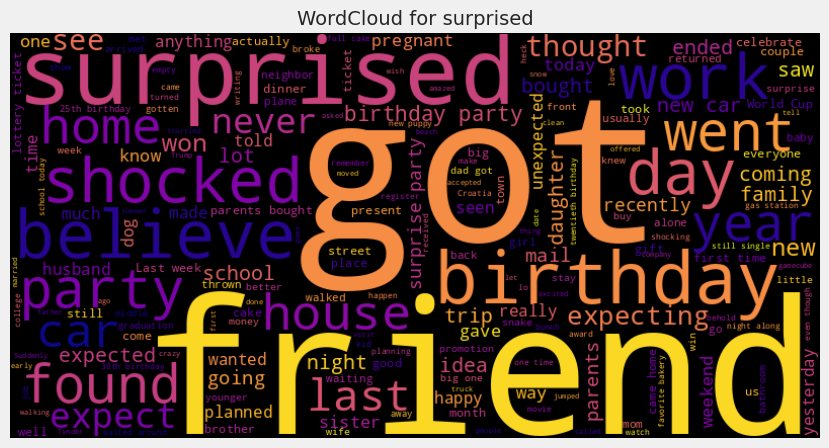

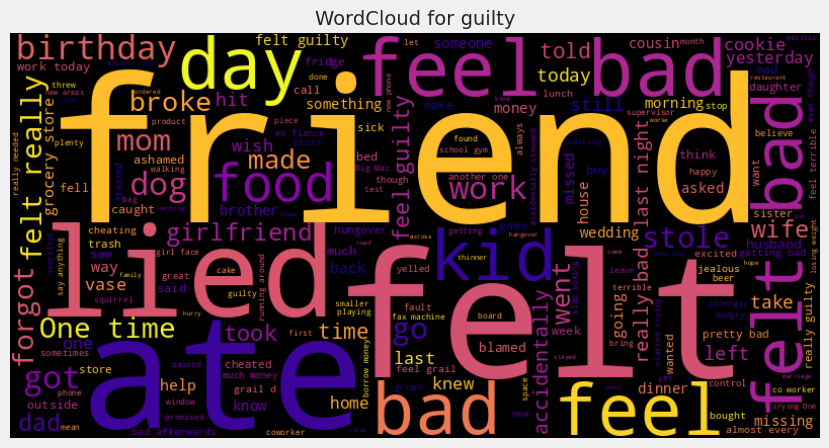

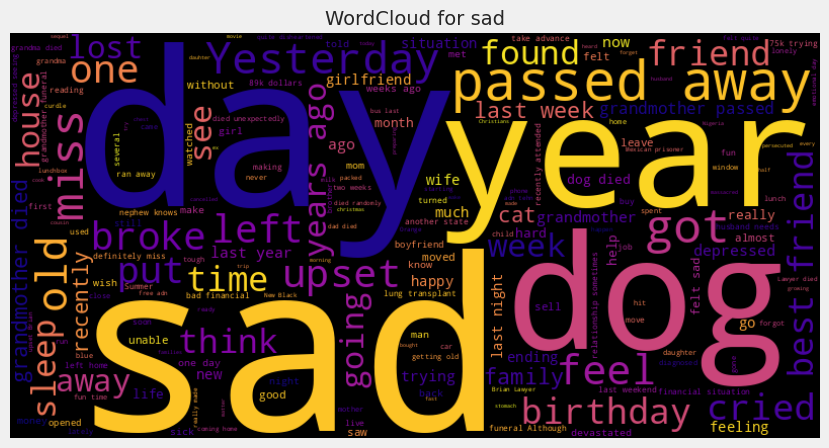

In [ ]:
def plot_wordcloud(emotion):
    text = " ".join(df[df['emotion'] == emotion]['Situation'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {emotion}", fontsize=14)
    plt.show()

for emo in df['emotion'].value_counts().index[:3]:
    plot_wordcloud(emo)


In [ ]:
emotion_text_length = df.groupby('emotion')['text_length'].mean().reset_index().sort_values(by='text_length')

fig = px.bar(emotion_text_length, x='emotion', y='text_length',
             title="Average Text Length per Emotion",
             labels={'emotion': 'Emotion', 'text_length': 'Average Text Length'},
             color='text_length',
             color_continuous_scale='Inferno',
             template='plotly_dark')


fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
model.save("emotion_classifier.keras")

In [ ]:
from tensorflow.keras.models import load_model

# Load the emotion classifier model
emotion_model = load_model('emotion_classifier.keras')

In [ ]:
df.head()

Situation      emotion  \
0  I remember going to the fireworks with my best...  sentimental   
1  I remember going to the fireworks with my best...  sentimental   
2  I remember going to the fireworks with my best...  sentimental   
3  I remember going to the fireworks with my best...  sentimental   
4  I remember going to the fireworks with my best...  sentimental   

                                empathetic_dialogues  \
0  Customer :I remember going to see the firework...   
1  Customer :This was a best friend. I miss her.\...   
2              Customer :We no longer talk.\nAgent :   
3  Customer :Was this a friend you were in love w...   
4             Customer :Where has she gone?\nAgent :   

                                              labels  
0  Was this a friend you were in love with, or ju...  
1                                Where has she gone?  
2  Oh was this something that happened because of...  
3                This was a best friend. I miss her.  
4                                 We no longer talk.

# Chatbot response

In [ ]:
pd.set_option('display.max_colwidth', None)


In [ ]:
df['empathetic_dialogues'].head()


0    Customer :I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people, we felt like the only people in the world.\nAgent :
1                                                                                                                                                                   Customer :This was a best friend. I miss her.\nAgent :
2                                                                                                                                                                                    Customer :We no longer talk.\nAgent :
3                                                                                                                                       Customer :Was this a friend you were in love with, or just a best friend?\nAgent :
4                                                                                                                                                                                   Customer :Where has she gone?\nAgent :
Name: empathetic_dialogues, dtype: object

In [ ]:
df['labels'].head()

0    Was this a friend you were in love with, or just a best friend?
1                                                Where has she gone?
2        Oh was this something that happened because of an argument?
3                                This was a best friend. I miss her.
4                                                 We no longer talk.
Name: labels, dtype: object

In [ ]:
import re

def clean_text(text):
    text = text.replace("Customer :", "").replace("Agent :", "")  # remove speaker tags
    text = text.replace("\\n", " ").replace("\n", " ")  # replace line breaks
    text = re.sub(r"\s+", " ", text)  # remove extra whitespace
    return text.strip().lower()  # strip and lowercase


In [ ]:
df['empathetic_dialogues_clean'] = df['empathetic_dialogues'].apply(clean_text)

In [ ]:
df['labels_clean'] = df['labels'].apply(clean_text)

In [ ]:
df['empathetic_dialogues_clean'].head()

0    i remember going to see the fireworks with my best friend. it was the first time we ever spent time alone together. although there was a lot of people, we felt like the only people in the world.
1                                                                                                                                                                   this was a best friend. i miss her.
2                                                                                                                                                                                    we no longer talk.
3                                                                                                                                       was this a friend you were in love with, or just a best friend?
4                                                                                                                                                                                   where has she gone?
Name: empathetic_dialogues_clean, dtype: object

In [ ]:
df['labels_clean'].head()

0    was this a friend you were in love with, or just a best friend?
1                                                where has she gone?
2        oh was this something that happened because of an argument?
3                                this was a best friend. i miss her.
4                                                 we no longer talk.
Name: labels_clean, dtype: object

In [ ]:
df['input_text'] = df['empathetic_dialogues_clean'].astype(str)
df['target_text'] = df['labels_clean'].astype(str)


In [39]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model

Mounted at /content/drive


In [ ]:

# --- Preprocessing Function ---
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.replace("Customer :", "").replace("Agent :", "")
    sentence = re.sub(r"\s+", " ", sentence).strip()
    return sentence

# --- Tokenization and Preparation ---
START_TOKEN = '<start>'
END_TOKEN = '<end>'

inputs = df['empathetic_dialogues'].apply(preprocess_sentence)
targets = df['labels'].apply(preprocess_sentence)
inputs = [f"{START_TOKEN} {text} {END_TOKEN}" for text in inputs]
targets = [f"{START_TOKEN} {text} {END_TOKEN}" for text in targets]

tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(inputs + targets)
VOCAB_SIZE = len(tokenizer.word_index) + 1
MAX_LENGTH = 150

input_seqs = tokenizer.texts_to_sequences(inputs)
target_seqs = tokenizer.texts_to_sequences(targets)
input_seqs = tf.keras.preprocessing.sequence.pad_sequences(input_seqs, maxlen=MAX_LENGTH, padding='post')
target_seqs = tf.keras.preprocessing.sequence.pad_sequences(target_seqs, maxlen=MAX_LENGTH, padding='post')

decoder_input_data = target_seqs[:, :-1]
decoder_target_data = target_seqs[:, 1:]
decoder_target_data = np.expand_dims(decoder_target_data, -1)

x_train_enc, x_val_enc, x_train_dec, x_val_dec, y_train, y_val = train_test_split(
    input_seqs, decoder_input_data, decoder_target_data, test_size=0.1, random_state=42)

BATCH_SIZE = 64
train_dataset = tf.data.Dataset.from_tensor_slices(((x_train_enc, x_train_dec), y_train)).shuffle(1000).batch(BATCH_SIZE)
val_dataset = tf.data.Dataset.from_tensor_slices(((x_val_enc, x_val_dec), y_val)).batch(BATCH_SIZE)

# --- Load GloVe Embeddings ---
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))
with open('/content/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        if len(values) != EMBEDDING_DIM + 1:
            continue
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        if word in tokenizer.word_index:
            idx = tokenizer.word_index[word]
            embedding_matrix[idx] = coefs

# --- Load Model and Recompile ---
model = load_model('/content/drive/MyDrive/best_model11 (1).keras', compile=False)

# Recompile with optimizer and loss again
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0007),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
checkpoint_callback = ModelCheckpoint('last_model.keras', save_best_only=True, monitor='val_loss', mode='min')

# --- Continue Training ---
model.fit(train_dataset,
          validation_data=val_dataset,
          epochs=5,  # continue for more epochs
          callbacks=[checkpoint_callback, early_stop, lr_reduce])


Epoch 1/5
909/909 ━━━━━━━━━━━━━━━━━━━━ 2209s 2s/step - accuracy: 0.9256 - loss: 0.3980 - val_accuracy: 0.9250 - val_loss: 0.4216 - learning_rate: 7.0000e-04
Epoch 2/5
909/909 ━━━━━━━━━━━━━━━━━━━━ 2209s 2s/step - accuracy: 0.9258 - loss: 0.3966 - val_accuracy: 0.9252 - val_loss: 0.4214 - learning_rate: 7.0000e-04
Epoch 3/5
909/909 ━━━━━━━━━━━━━━━━━━━━ 2190s 2s/step - accuracy: 0.9260 - loss: 0.3933 - val_accuracy: 0.9251 - val_loss: 0.4231 - learning_rate: 7.0000e-04
Epoch 4/5
909/909 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9263 - loss: 0.3899
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.
909/909 ━━━━━━━━━━━━━━━━━━━━ 2245s 2s/step - accuracy: 0.9263 - loss: 0.3899 - val_accuracy: 0.9253 - val_loss: 0.4232 - learning_rate: 7.0000e-04
Epoch 5/5
909/909 ━━━━━━━━━━━━━━━━━━━━ 2199s 2s/step - accuracy: 0.9272 - loss: 0.3751 - val_accuracy: 0.9258 - val_loss: 0.4121 - learning_rate: 3.5000e-04


In [ ]:
model.save('chatbot_response.keras')

In [52]:
test_input = "i am so sad today"
response = decode_sequence(test_input, tokenizer, model)
print("User:", test_input)
print("Bot:", postprocess_response(response))



User: i am so sad today
Bot: I m sorry to hear that. what happened?


In [51]:
import pickle
import random
import re
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model and tokenizer
model = load_model('/content/drive/MyDrive/chatbot_response (3).keras', compile=False)
with open('/content/drive/MyDrive/tokenizer (1).pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Parameters
MAX_LEN = 100

# Fallback responses
fallbacks = [
    "I'm here for you. Please tell me more.",
    "That sounds really tough. Want to share more about it?",
    "You're not alone. Would you like to talk more?",
    "I’m listening. Go on when you're ready."
]

# Preprocessing for input
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.replace("Customer :", "").replace("Agent :", "")
    sentence = re.sub(r"\s+", " ", sentence).strip()
    return sentence

# Postprocessing for output
def postprocess_response(response):
    response = response.replace("i ", "I ")
    response = response.replace("i'm", "I'm").replace("i m", "I'm")
    response = re.sub(r"\s([?.!,])", r"\1", response)
    return response.capitalize()



# Decode sequence from the model
def decode_sequence(input_text, tokenizer, model, max_len=MAX_LEN):
    input_text = preprocess_sentence(input_text)
    input_seq = tokenizer.texts_to_sequences([f"<start> {input_text} <end>"])
    input_seq = pad_sequences(input_seq, maxlen=max_len, padding='post')

    decoder_input = tokenizer.texts_to_sequences(["<start>"])[0]
    decoder_input = tf.expand_dims(decoder_input, 0)

    result = []

    for _ in range(max_len):
        predictions = model.predict([input_seq, decoder_input], verbose=0)
        predicted_id = tf.argmax(predictions[0, -1, :]).numpy()
        predicted_word = tokenizer.index_word.get(predicted_id)

        if predicted_word == "<end>" or predicted_word is None:
            break

        result.append(predicted_word)
        decoder_input = tf.concat([decoder_input, [[predicted_id]]], axis=-1)

    if not result:
        return random.choice(fallbacks)

    response = postprocess_response(' '.join(result))

    if is_low_quality(response):
        return random.choice(fallbacks)

    return response

# Handle greetings
def handle_greeting(user_input):
    greetings = ["hello", "hi", "hey", "good morning", "good afternoon", "good evening"]
    user_input = user_input.lower().strip()

    if any(greet in user_input for greet in greetings):
        return "Hi! How are you feeling today? I'm here to listen."

    return None




# Chat loop with better greeting and emotion handling
def chat():
    print("Bot: Hi, I'm here to support you. How are you feeling today?")
    while True:
        user_input = input("User: ")

        # Handle greetings first
        greeting_response = handle_greeting(user_input)
        if greeting_response:
            print("Bot:", greeting_response)
            continue

        # Handle emotional situations (e.g., divorce, sadness)
        emotion_response = handle_emotion(user_input)
        if emotion_response:
            print("Bot:", emotion_response)
            continue

        # Handle exam failure specifically
        exam_failure_response = handle_exam_failure(user_input)
        if exam_failure_response:
            print("Bot:", exam_failure_response)
            continue

        # Handle exit
        if user_input.lower() in ["exit", "quit", "bye"]:
            print("Bot: Take care! Remember, you're not alone.")
            break

        # Get response from the model
        response = decode_sequence(user_input, tokenizer, model)
        print("Bot:", response)

# Start the chatbot
chat()


Bot: Hi, I'm here to support you. How are you feeling today?
User: hello
Bot: Hi! How are you feeling today? I'm here to listen.
User: i feel very sad today
Bot: I'm really sorry you're feeling this way. Sometimes sharing more about it helps. Do you want to talk?
User: yes i faild on my exam today
Bot: I'm really sorry to hear that. Failing an exam can be really tough. It's okay to feel upset. Would you like to talk about what happened during the exam?
User: i could not answer the questions
Bot: That sounds really tough. Want to share more about it?
User: The questions were very difficult and I did not study well
Bot: I m sorry to hear that. what happened?
User: exit
Bot: Take care! Remember, you're not alone.


In [53]:
import pickle
import random
import re
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load model and tokenizer
model = load_model('/content/drive/MyDrive/chatbot_response (3).keras', compile=False)
with open('/content/drive/MyDrive/tokenizer (1).pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Parameters
MAX_LEN = 100

# Fallback responses
fallbacks = [
    "I'm here for you. Please tell me more.",
    "That sounds really tough. Want to share more about it?",
    "You're not alone. Would you like to talk more?",
    "I’m listening. Go on when you're ready."
]

# Preprocessing for input
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.replace("Customer :", "").replace("Agent :", "")
    sentence = re.sub(r"\s+", " ", sentence).strip()
    return sentence

# Postprocessing for output
def postprocess_response(response):
    response = response.replace("i ", "I ")
    response = response.replace("i'm", "I'm").replace("i m", "I'm")
    response = re.sub(r"\s([?.!,])", r"\1", response)
    return response.capitalize()



# Decode sequence from the model
def decode_sequence(input_text, tokenizer, model, max_len=MAX_LEN):
    input_text = preprocess_sentence(input_text)
    input_seq = tokenizer.texts_to_sequences([f"<start> {input_text} <end>"])
    input_seq = pad_sequences(input_seq, maxlen=max_len, padding='post')

    decoder_input = tokenizer.texts_to_sequences(["<start>"])[0]
    decoder_input = tf.expand_dims(decoder_input, 0)

    result = []

    for _ in range(max_len):
        predictions = model.predict([input_seq, decoder_input], verbose=0)
        predicted_id = tf.argmax(predictions[0, -1, :]).numpy()
        predicted_word = tokenizer.index_word.get(predicted_id)

        if predicted_word == "<end>" or predicted_word is None:
            break

        result.append(predicted_word)
        decoder_input = tf.concat([decoder_input, [[predicted_id]]], axis=-1)

    if not result:
        return random.choice(fallbacks)

    response = postprocess_response(' '.join(result))

    if is_low_quality(response):
        return random.choice(fallbacks)

    return response

# Handle greetings
def handle_greeting(user_input):
    greetings = ["hello", "hi", "hey", "good morning", "good afternoon", "good evening"]
    user_input = user_input.lower().strip()

    if any(greet in user_input for greet in greetings):
        return "Hi! How are you feeling today? I'm here to listen."

    return None




# Chat loop with better greeting and emotion handling
def chat():
    print("Bot: Hi, I'm here to support you. How are you feeling today?")
    while True:
        user_input = input("User: ")

        # Handle greetings first
        greeting_response = handle_greeting(user_input)
        if greeting_response:
            print("Bot:", greeting_response)
            continue

        # Handle emotional situations (e.g., divorce, sadness)
        emotion_response = handle_emotion(user_input)
        if emotion_response:
            print("Bot:", emotion_response)
            continue

        # Handle exam failure specifically
        exam_failure_response = handle_exam_failure(user_input)
        if exam_failure_response:
            print("Bot:", exam_failure_response)
            continue

        # Handle exit
        if user_input.lower() in ["exit", "quit", "bye"]:
            print("Bot: Take care! Remember, you're not alone.")
            break

        # Get response from the model
        response = decode_sequence(user_input, tokenizer, model)
        print("Bot:", response)

# Start the chatbot
chat()


Bot: Hi, I'm here to support you. How are you feeling today?
User: hi
Bot: Hi! How are you feeling today? I'm here to listen.
User: i am feeling verty happy today
Bot: I m sure you will be fine.
User: i said i am very happy not sad
Bot: I'm really sorry you're feeling this way. Sometimes sharing more about it helps. Do you want to talk?
User: exit
Bot: Take care! Remember, you're not alone.
